## Multiple time series on common axes
For this exercise, you will construct a plot showing four time series stocks on the same axes. The time series in question are represented in the session using the identifiers aapl, ibm, csco, and msft. You'll generate a single plot showing all the time series on common axes with a legend.

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
#!wget https://assets.datacamp.com/production/repositories/558/datasets/8dd58ff003e399765cdf348305783b842ff1d7eb/stocks.csv

In [35]:
stocks = pd.read_csv('stocks.csv', parse_dates=["Date"]).set_index('Date')
aapl = stocks.AAPL
ibm = stocks.IBM
csco = stocks.CSCO
msft = stocks.MSFT

DatetimeIndex(['2000-01-03', '2000-01-04', '2000-01-05', '2000-01-06',
               '2000-01-07', '2000-01-10', '2000-01-11', '2000-01-12',
               '2000-01-13', '2000-01-14',
               ...
               '2013-12-17', '2013-12-18', '2013-12-19', '2013-12-20',
               '2013-12-23', '2013-12-24', '2013-12-26', '2013-12-27',
               '2013-12-30', '2013-12-31'],
              dtype='datetime64[ns]', name='Date', length=3521, freq=None)

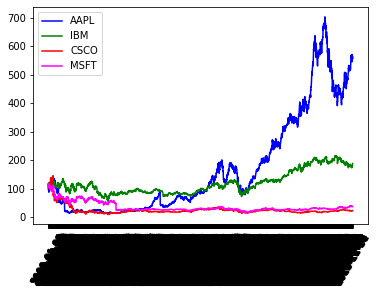

In [16]:
# Plot the aapl time series in blue
plt.plot(aapl, color='blue', label='AAPL')

# Plot the ibm time series in green
plt.plot(ibm, color='green', label='IBM')

# Plot the csco time series in red
plt.plot(csco, color='red', label='CSCO')

# Plot the msft time series in magenta
plt.plot(msft, color='magenta', label='MSFT')

# Add a legend in the top left corner of the plot
plt.legend(loc='upper left')

# Specify the orientation of the xticks
plt.xticks(rotation=60)

# Display the plot
plt.show()


## Multiple time series slices (1)
You can easily slice subsets corresponding to different time intervals from a time series. In particular, you can use strings like '2001:2005', '2011-03:2011-12', or '2010-04-19:2010-04-30' to extract data from time intervals of length 5 years, 10 months, or 12 days respectively.

- Unlike slicing from standard Python lists, tuples, and strings, when slicing time series by labels (and other pandas Series & DataFrames by labels), the slice includes the right-most portion of the slice. That is, extracting my_time_series['1990':'1995'] extracts data from my_time_series corresponding to 1990, 1991, 1992, 1993, 1994, and 1995 inclusive.
- You can use partial strings or datetime objects for indexing and slicing from time series.

For this exercise, you will use time series slicing to plot the time series aapl over its full 11-year range and also over a shorter 2-year range. You'll arrange these plots in a 2×1 grid of subplots

/home/jloscalzo/.local/lib/python3.6/site-packages/pandas/plotting/_matplotlib/converter.py:103: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


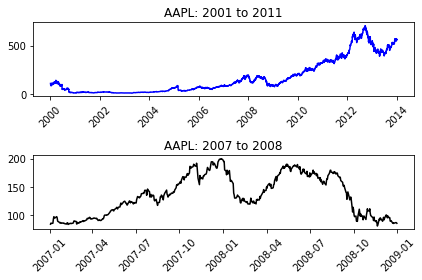

In [36]:
# Plot the series in the top subplot in blue
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('AAPL: 2001 to 2011')
plt.plot(aapl, color='blue')

# Slice aapl from '2007' to '2008' inclusive: view
view = aapl['2007':'2008']

# Plot the sliced data in the bottom subplot in black
plt.subplot(2,1,2)
plt.xticks(rotation=45)
plt.title('AAPL: 2007 to 2008')
plt.plot(view, color='black')
plt.tight_layout()
plt.show()


## Multiple time series slices (2)
In this exercise, you will use the same time series aapl from the previous exercise and plot tighter views of the data.

- Partial string indexing works without slicing as well. For instance, using my_time_series['1995'], my_time_series['1999-05'], and my_time_series['2000-11-04'] respectively extracts views of the time series my_time_series corresponding to the entire year 1995, the entire month May 1999, and the entire day November 4, 2000.

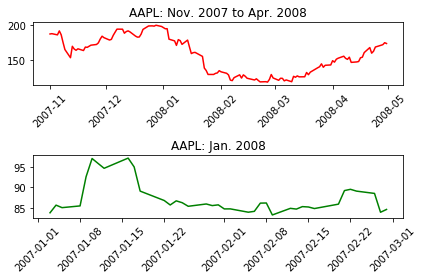

In [39]:
# Slice aapl from Nov. 2007 to Apr. 2008 inclusive: view
view_1 = aapl['2007-11':'2008-04']

# Plot the sliced series in the top subplot in red
plt.subplot(2,1,1)
plt.xticks(rotation=45)
plt.title('AAPL: Nov. 2007 to Apr. 2008')
plt.plot(view_1, color='red')

# Reassign the series by slicing the month January 2008
view_2 = aapl['2007-01':'2007-02']

# Plot the sliced series in the bottom subplot in green
plt.subplot(2,1,2)
plt.plot(view_2, color='green')
plt.title('AAPL: Jan. 2008')
plt.xticks(rotation=45)

# Improve spacing and display the plot
plt.tight_layout()
plt.show()

## Plotting an inset view
Remember, rather than comparing plots with subplots or overlayed plots, you can generate an inset view directly using plt.axes(). In this exercise, you'll reproduce two of the time series plots from the preceding two exercises. Your figure will contain an inset plot to highlight the dramatic changes in AAPL stock price between November 2007 and April 2008 (as compared to the 11 years from 2001 to 2011).

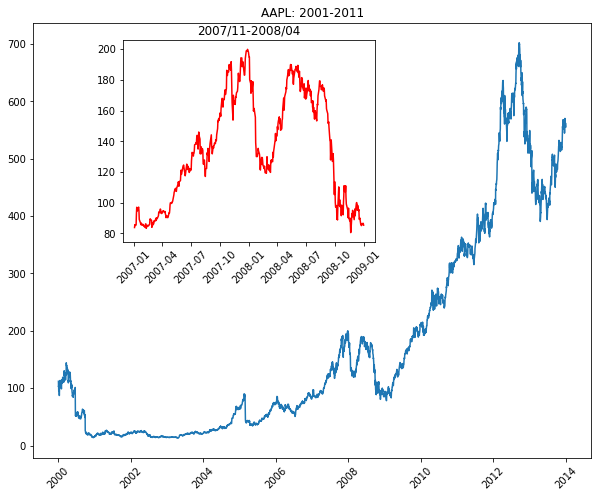

In [43]:
plt.figure(figsize=(10,8))
plt.plot(aapl)
plt.xticks(rotation=45)
plt.title('AAPL: 2001-2011')

# Specify the axes
plt.axes([0.25,0.5, 0.35, 0.35])

# Plot the sliced series in red using the current axes
plt.plot(view, color='red')
plt.xticks(rotation=45)
plt.title('2007/11-2008/04')
plt.show()

### Plotting moving averages
In this exercise, you will plot pre-computed moving averages of AAPL stock prices in distinct subplots.

- The time series aapl is overlayed in black in each subplot for comparison.
- The time series mean_30, mean_75, mean_125, and mean_250 have been computed for you (containing the windowed averages of the series aapl computed over windows of width 30 days, 75 days, 125 days, and 250 days respectively).

In [47]:
mean_30 = aapl.rolling('30d').mean()
mean_75 = aapl.rolling('75d').mean()
mean_125 =aapl.rolling('125d').mean()
mean_250 = aapl.rolling('250d').mean()

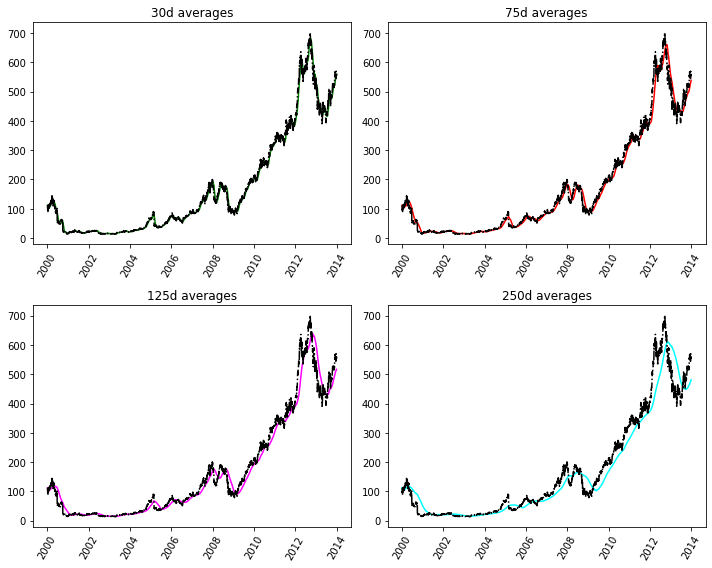

In [52]:
plt.figure(figsize=(10,8))
# Plot the 30-day moving average in the top left subplot in green
plt.subplot(2,2,1)
plt.plot(mean_30, color='green')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('30d averages')

# Plot the 75-day moving average in the top right subplot in red
plt.subplot(2,2,2)
plt.plot(mean_75, 'red')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('75d averages')

# Plot the 125-day moving average in the bottom left subplot in magenta
plt.subplot(2, 2, 3)
plt.plot(mean_125, color='magenta')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('125d averages')

# Plot the 250-day moving average in the bottom right subplot in cyan
plt.subplot(2,2,4)
plt.plot(mean_250, color='cyan')
plt.plot(aapl, 'k-.')
plt.xticks(rotation=60)
plt.title('250d averages')

plt.tight_layout()
# Display the plot
plt.show()


## Plotting moving standard deviations
Having plotted pre-computed moving averages of AAPL stock prices on distinct subplots in the previous exercise, you will now plot pre-computed moving standard deviations of the same stock prices, this time together on common axes.

- The time series aapl is not plotted in this case; it is of a different length scale than the standard deviations.
- The time series std_30, std_75, stdn_125, & std_250 have been computed for you (containing the windowed standard deviations of the series aapl computed over windows of width 30 days, 75 days, 125 days, & 250 days respectively).

In [53]:
std_30 = aapl.rolling('30d').std()
std_75 = aapl.rolling('75d').std()
std_125 =aapl.rolling('125d').std()
std_250 = aapl.rolling('250d').std()

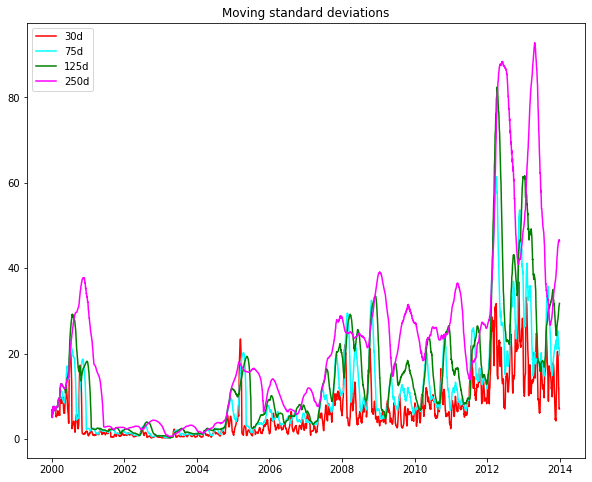

In [56]:
plt.figure(figsize=(10,8))
# Plot std_30 in red
plt.plot(std_30, color='red', label='30d')

# Plot std_75 in cyan
plt.plot(std_75, color='cyan', label='75d')

# Plot std_125 in green
plt.plot(std_125, color='green', label='125d')

# Plot std_250 in magenta
plt.plot(std_250, color='magenta', label='250d')

# Add a legend to the upper left
plt.legend(loc='upper left')
# Add a title
plt.title('Moving standard deviations')

# Display the plot
plt.show()


# wider windows admits greater variability